Chapter 20

# 先验分布 $\alpha$ 对后验分布影响
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码模拟了贝叶斯更新中先验分布参数（$\alpha$）变化对后验分布的影响，以估计总体中某事件（例如“兔子”）的比例。该估计基于 Beta 分布的先验和后验，逐步展示了不同$\alpha$值的影响。以下为代码的主要步骤和解释：

1. **数据和先验分布设置**：假设样本总数为 200，其中有 60 个是兔子，因此观察到的比例为 $p = \frac{s}{n} = \frac{60}{200} = 0.3$。选择 Beta 分布 $\text{Beta}(\alpha, \beta)$ 作为先验分布，其中 $\alpha$ 和 $\beta$ 控制了先验的集中程度。代码中 $\alpha$ 取值为 $[1, 2, 8, 16, 32, 64]$，以观察其对分布的影响。

2. **后验分布计算**：给定观察到的样本数 $n$ 和事件数量 $s$，后验分布为：
   $$
   \text{Beta}(s + \alpha, n - s + \beta)
   $$
   每次选择不同的 $\alpha$，根据贝叶斯公式更新后验并绘制出先验、似然和后验的密度曲线，以展示后验收敛性。

3. **最大似然估计（MLE）和最大后验估计（MAP）**：
   - **MLE**（绿色线）使用观测到的比例 $p = \frac{s}{n}$。
   - **MAP**（红色线）基于后验分布计算，其公式为：
     $$
     \frac{s + \alpha - 1}{n + \alpha + \beta - 2}
     $$
   - **先验众数**（蓝色线）： $\frac{\alpha - 1}{\alpha + \beta - 2}$。

4. **3D可视化 - 先验分布**：
   - 随着 $\alpha$ 增加，先验分布 $\text{Beta}(\alpha, \alpha)$ 的形状发生变化。代码绘制了不同 $\alpha$ 值下 $\theta$ 的概率密度函数，以展示先验分布的变化情况。当 $\alpha$ 较小时，先验分布较为分散，而 $\alpha$ 增加会使分布集中于中心值（例如 $\theta=0.5$），反映出先验更强的信念。

5. **3D可视化 - 后验分布**：
   - 代码计算不同 $\alpha$ 值下的后验分布 $\text{Beta}(s + \alpha, n - s + \alpha)$，并绘制出三维的后验概率密度函数网格和等高线图。通过对比后验和先验的差异，展示了数据加入后的后验分布变化，说明随着观测数据（即观察到的兔子和鸡数量）的增加，后验逐渐从先验分布向观测结果靠拢。

该代码展示了先验分布参数如何影响贝叶斯估计中的后验分布形状，并展示了先验知识与观测数据融合的过程。

## 导入必要的库

In [1]:
import scipy.stats as stats  # 导入SciPy中的stats模块用于统计计算
import numpy as np  # 导入NumPy用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib用于绘图

## 定义参数和数据

In [2]:
n = 200  # 设置样本总数为200
s = 60  # 设置样本中兔子的数量为60
p = s / n  # 计算兔子在样本中的比例
binom_dist = stats.binom(n, p)  # 定义二项分布
mu = binom_dist.mean()  # 计算二项分布的均值
theta_array = np.linspace(0, 1, 500)  # 生成从0到1的500个θ值

## 先验分布和后验分布的绘制

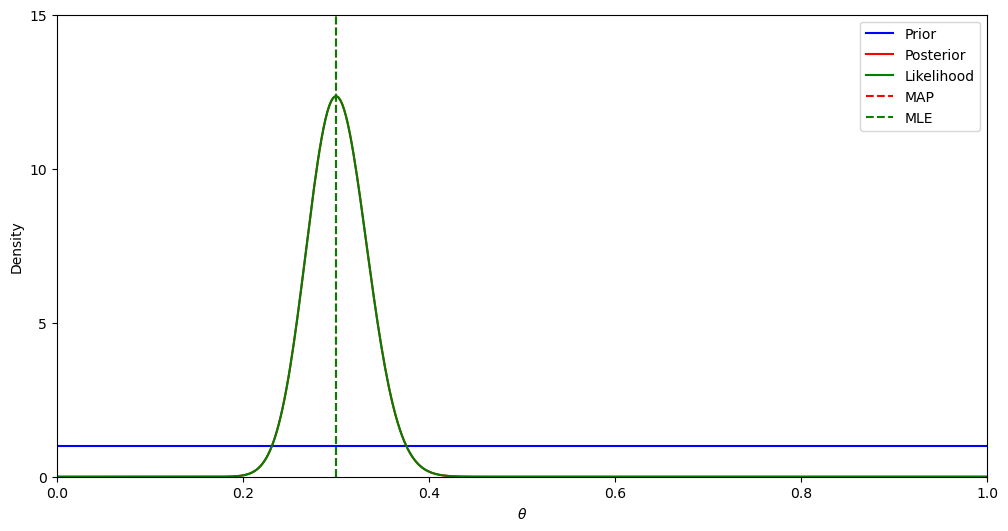

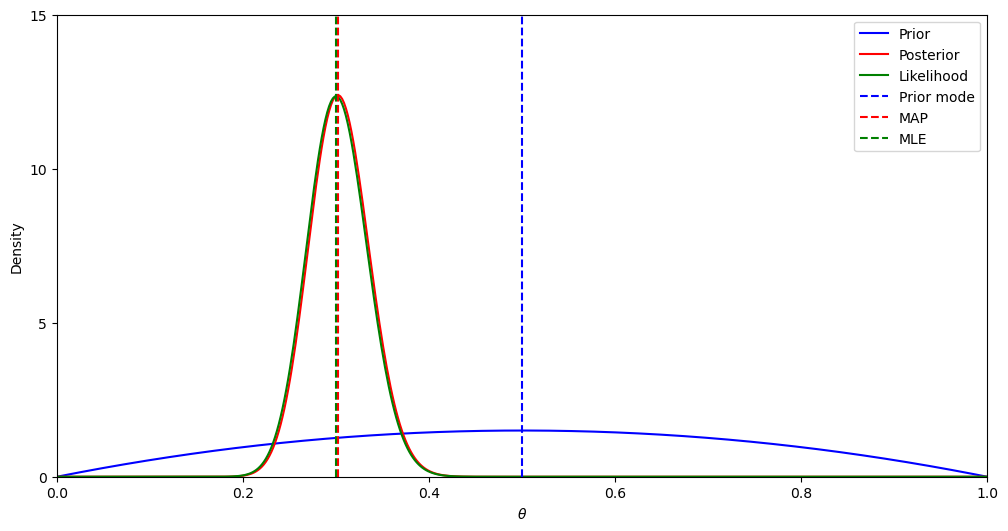

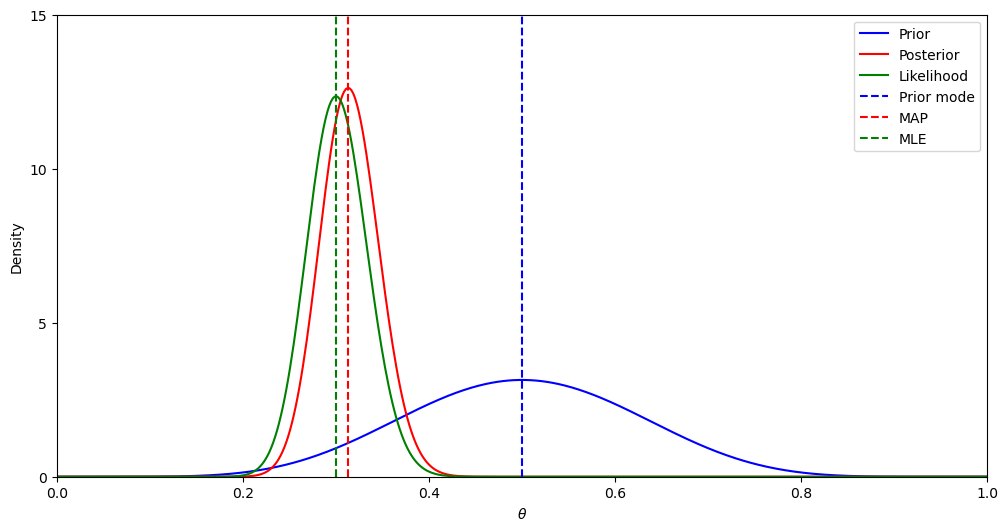

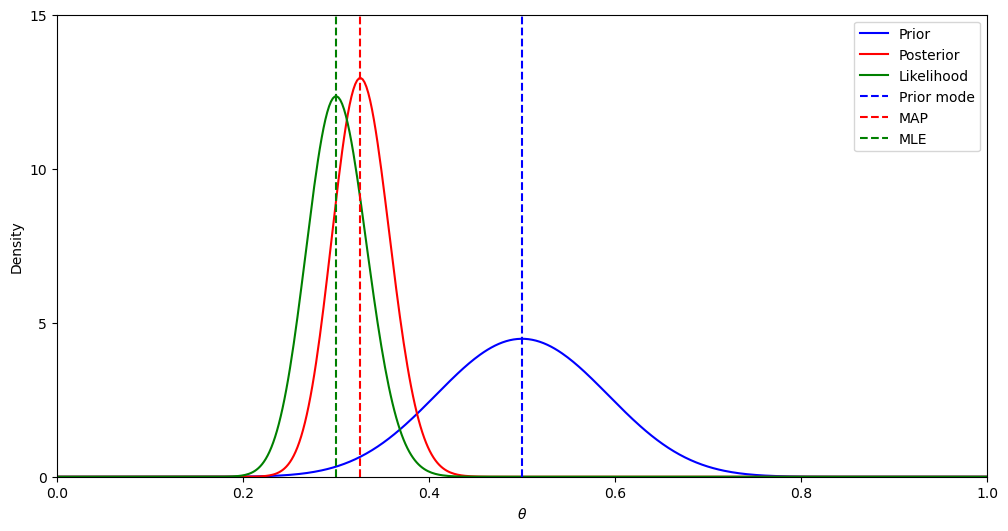

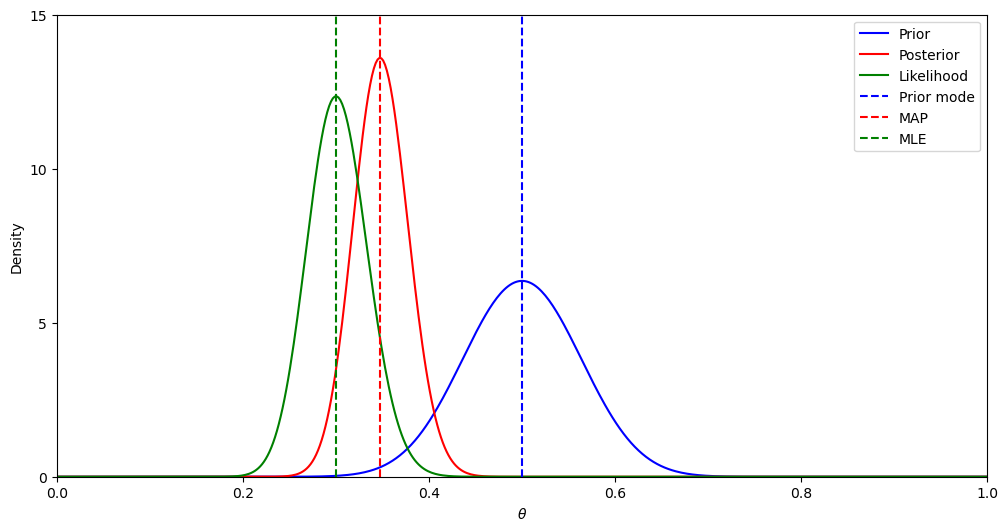

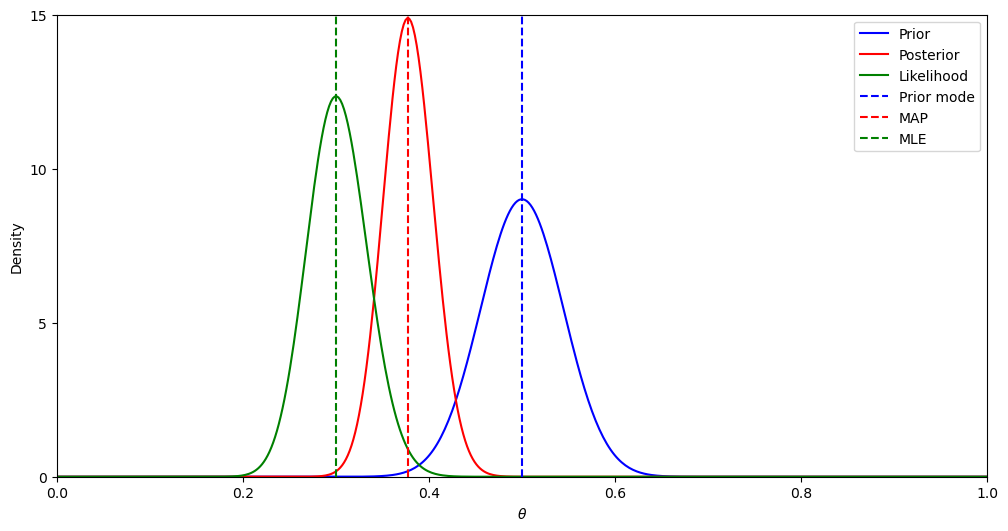

In [3]:
alpha_arrays = [1, 2, 8, 16, 32, 64]  # 定义不同的alpha值

# 遍历alpha值，计算并绘制每个alpha下的先验和后验分布
for alpha in alpha_arrays:
    
    beta = alpha  # 设置beta等于alpha，保持1:1比率的先验假设
    
    prior = stats.beta(alpha, beta)  # 定义先验分布Beta(alpha, beta)
    
    posterior = stats.beta(s + alpha, n - s + beta)  # 计算后验分布Beta(s + alpha, n - s + beta)
    
    fig, ax = plt.subplots(figsize=(12, 6))  # 创建绘图窗口
    
    plt.plot(theta_array, prior.pdf(theta_array), label='Prior', c='b')  # 绘制先验分布
    plt.plot(theta_array, posterior.pdf(theta_array), label='Posterior', c='r')  # 绘制后验分布
    
    factor_normalize = 1 / (n + 1)  # 设置标准化因子，用于标准化似然函数
    plt.plot(theta_array, stats.binom(n, theta_array).pmf(s) / factor_normalize, label='Likelihood', c='g')  # 绘制似然函数
    
    # 绘制先验分布的众数（模式）
    try:
        plt.axvline((alpha - 1) / (alpha + beta - 2), c='b', linestyle='--', label='Prior mode')
    except:
        pass
    
    # 绘制后验分布的最大后验估计（MAP）
    plt.axvline((s + alpha - 1) / (n + alpha + beta - 2), c='r', linestyle='--', label='MAP')
    
    # 绘制二项分布的最大似然估计（MLE）
    plt.axvline(mu / n, c='g', linestyle='--', label='MLE')
    
    plt.xlim([0, 1])  # 设置x轴范围
    plt.ylim([0, 15])  # 设置y轴范围
    plt.yticks([0, 5, 10, 15])  # 设置y轴刻度
    plt.xlabel(r'$\theta$')  # 设置x轴标签
    plt.ylabel('Density')  # 设置y轴标签
    plt.legend()  # 显示图例

## 先验分布的三维可视化

C:\Users\james\AppData\Local\Temp\ipykernel_18140\3565789780.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # 调整图形布局


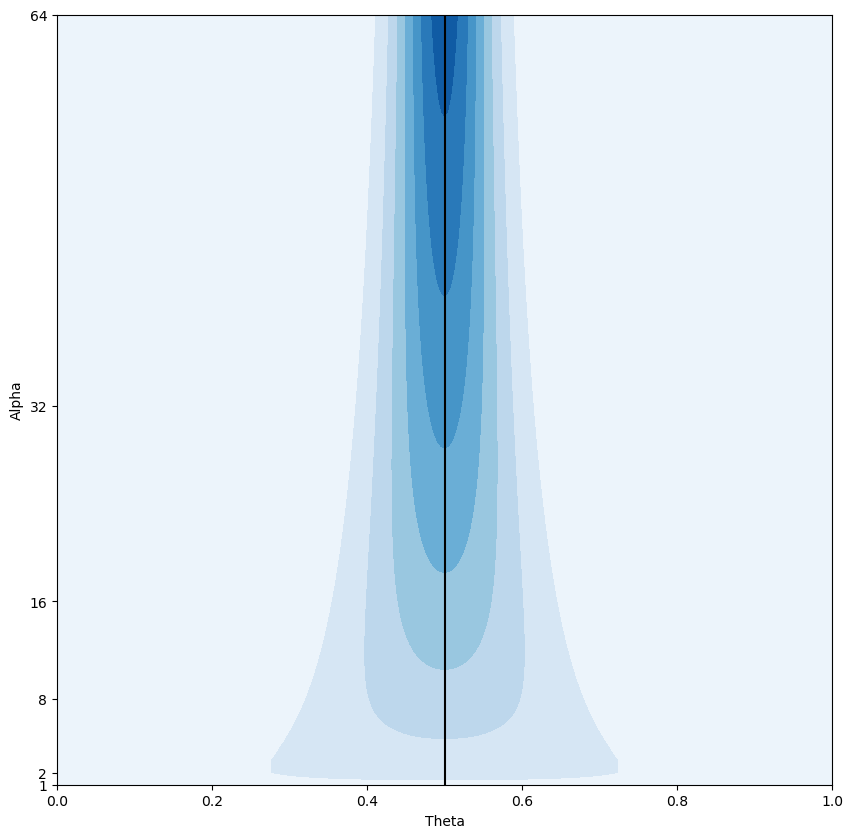

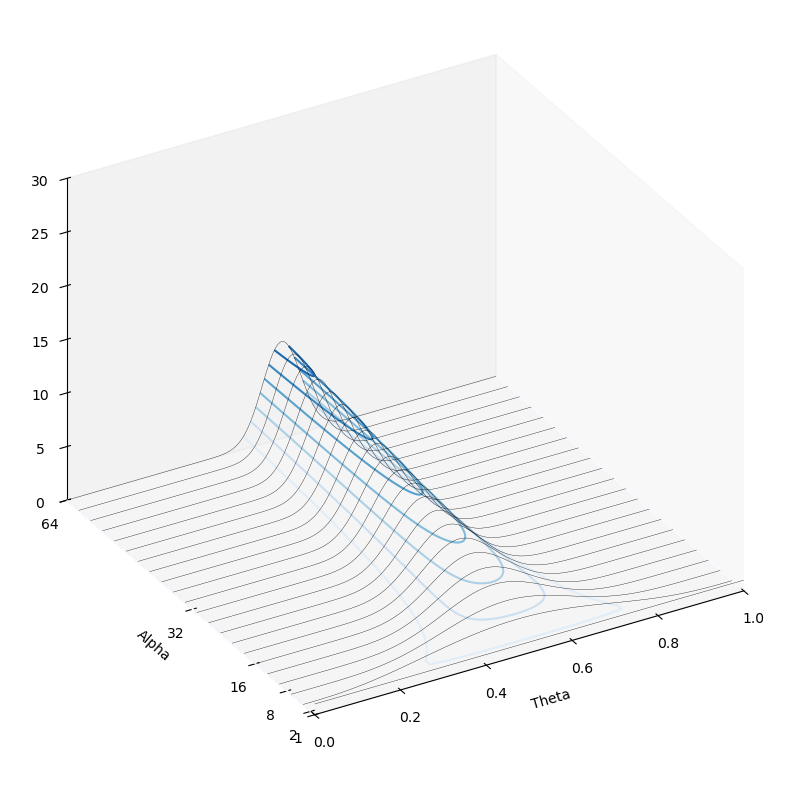

In [4]:
a_list = np.arange(1, 64 + 1)  # 定义从1到64的alpha值数组
theta_MAP = (s + a_list - 1) / (n + 2 * a_list - 2)  # 计算不同alpha值下的MAP
theta_MLE = s / n  # 计算MLE

Prior_PDF_matrix = []  # 初始化先验PDF矩阵

# 计算每个alpha值下的先验PDF
for a_idx in a_list:
    posterior = stats.beta(a_idx, a_idx)  # 定义先验分布
    pdf_idx = posterior.pdf(theta_array)  # 计算PDF值
    Prior_PDF_matrix.append(pdf_idx)  # 将PDF值添加到矩阵中

Prior_PDF_matrix = np.array(Prior_PDF_matrix)  # 将PDF矩阵转换为NumPy数组

fig, ax = plt.subplots(figsize=(10, 10))  # 创建绘图窗口
plt.contourf(theta_array, a_list, Prior_PDF_matrix, levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10), cmap='Blues')  # 绘制等高填充图

plt.axvline(x=0.5, color='k')  # 绘制先验分布模式位置的垂直线
plt.xlabel('Theta')  # 设置x轴标签
plt.ylabel('Alpha')  # 设置y轴标签
plt.xlim(0, 1)  # 设置x轴范围
plt.ylim(1, a_list.max())  # 设置y轴范围
plt.yticks([1, 2, 8, 16, 32, 64])  # 设置y轴刻度

# 创建三维图形窗口
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})

tt, aa = np.meshgrid(theta_array, a_list)  # 创建网格数据
ax.plot_wireframe(tt, aa, Prior_PDF_matrix, color=[0, 0, 0], linewidth=0.25, rstride=3, cstride=0)  # 绘制线框图
ax.contour(theta_array, a_list, Prior_PDF_matrix, levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10), cmap='Blues')  # 绘制等高线

ax.set_proj_type('ortho')  # 设置投影类型为正交

plt.xlabel('Theta')  # 设置x轴标签
plt.ylabel('Alpha')  # 设置y轴标签
plt.xlim(0, 1)  # 设置x轴范围
plt.ylim(1, a_list.max())  # 设置y轴范围
plt.yticks([1, 2, 8, 16, 32, 64])  # 设置y轴刻度

ax.set_zlim3d([0, 30])  # 设置z轴范围
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.tight_layout()  # 调整图形布局
ax.grid(False)  # 关闭网格

## 后验分布的三维可视化

([<matplotlib.axis.YTick at 0x1c0af16dd60>,
 [Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 8, '8'),
  Text(0, 16, '16'),
  Text(0, 32, '32'),
  Text(0, 64, '64')])

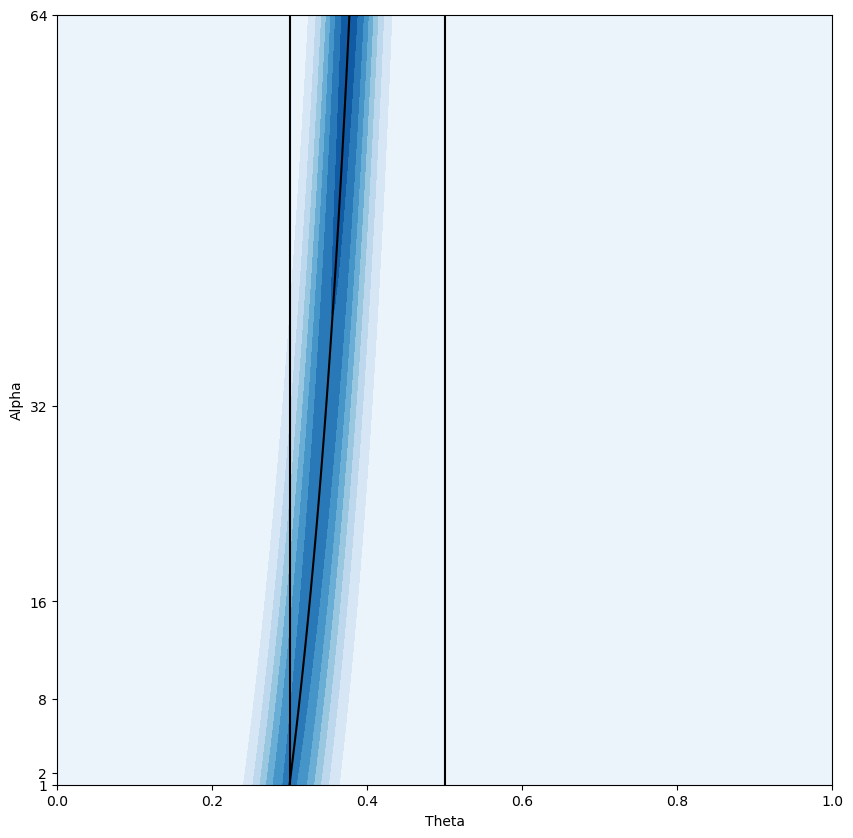

In [5]:
Prior_PDF_matrix = []  # 初始化后验PDF矩阵

# 计算每个alpha值下的后验PDF
for a_idx in a_list:
    posterior = stats.beta(s + a_idx, n - s + a_idx)  # 定义后验分布
    pdf_idx = posterior.pdf(theta_array)  # 计算PDF值
    Prior_PDF_matrix.append(pdf_idx)  # 将PDF值添加到矩阵中

Prior_PDF_matrix = np.array(Prior_PDF_matrix)  # 将PDF矩阵转换为NumPy数组

fig, ax = plt.subplots(figsize=(10, 10))  # 创建绘图窗口
plt.contourf(theta_array, a_list, Prior_PDF_matrix, levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10), cmap='Blues')  # 绘制等高填充图

plt.plot(theta_MAP, a_list, color='k')  # 绘制MAP曲线
plt.axvline(x=theta_MLE, color='k')  # 绘制MLE位置的垂直线
plt.axvline(x=0.5, color='k')  # 绘制先验分布模式位置的垂直线

plt.xlabel('Theta')  # 设置x轴标签
plt.ylabel('Alpha')  # 设置y轴标签
plt.xlim(0, 1)  # 设置x轴范围
plt.ylim(1, a_list.max())  # 设置y轴范围
plt.yticks([1, 2, 8, 16, 32, 64])  # 设置y轴刻度

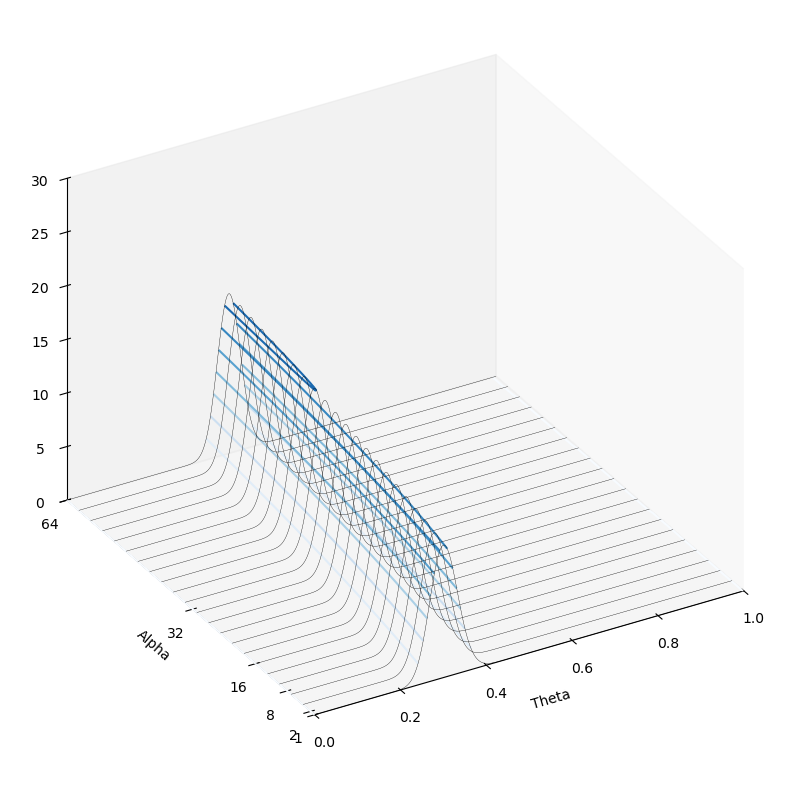

In [6]:
# 创建三维后验图形窗口
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})

tt, aa = np.meshgrid(theta_array, a_list)  # 创建网格数据
ax.plot_wireframe(tt, aa, Prior_PDF_matrix, color=[0, 0, 0], linewidth=0.25, rstride=3, cstride=0)  # 绘制线框图
ax.contour(theta_array, a_list, Prior_PDF_matrix, levels=np.linspace(0, Prior_PDF_matrix.max() * 1.2, 10), cmap='Blues')  # 绘制等高线

ax.set_proj_type('ortho')  # 设置投影类型为正交

plt.xlabel('Theta')  # 设置x轴标签
plt.ylabel('Alpha')  # 设置y轴标签
plt.xlim(0, 1)  # 设置x轴范围
plt.ylim(1, a_list.max())  # 设置y轴范围
plt.yticks([1, 2, 8, 16, 32, 64])  # 设置y轴刻度

ax.set_zlim3d([0, 30])  # 设置z轴范围
ax.view_init(azim=-120, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格